For dataset look "https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents"

## USA Accindents Analysis
TODO
1 Talk about EDA 
2 Talk about Dataset(Source,What it contains,Why it is useful)
- Kaggle
- Data of accidents in USA
- Can be used to prevent accidents 
- It does not contain data about new york
OBJECTIVE:  Analyze US traffic accident data to identify key risk factors influencing accident severity and frequency, and build a predictive model to classify accident severity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset 

In [2]:
df = pd.read_csv("US_Accidents_March23.csv",low_memory=True)

# Cleaning and Perparing Dataset
- Look into information about Data
- Checking each coloumn
- Find missing values 


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


## Counting Null Value 

In [5]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

## Droping coloumn which has most missing values
- End_Lat
- End_Lng
- Temprature
- Wind_Chill
- Precipitation
- Wind_Speed

In [6]:
df.drop(columns=["End_Lat","End_Lng","Temperature(F)","Wind_Chill(F)","Precipitation(in)","Wind_Speed(mph)"],inplace=True)
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
num_col = df.select_dtypes(include=["number"]).columns
print(f"Number of numarical coloumns is {len(num_col)}")

Number of numarical coloumns is 7


## Percentage of missing value per coloumn

In [8]:
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_percentage = (missing_percentage[missing_percentage != 0])
df["Time"] = df["Sunrise_Sunset"]
missing_percentage

Description              0.000065
Street                   0.140637
City                     0.003274
Zipcode                  0.024779
Timezone                 0.101030
Airport_Code             0.292881
Weather_Timestamp        1.555666
Humidity(%)              2.253301
Pressure(in)             1.820288
Visibility(mi)           2.291524
Wind_Direction           2.267043
Weather_Condition        2.244438
Sunrise_Sunset           0.300787
Civil_Twilight           0.300787
Nautical_Twilight        0.300787
Astronomical_Twilight    0.300787
dtype: float64

## ploting bar for missing values

<Axes: >

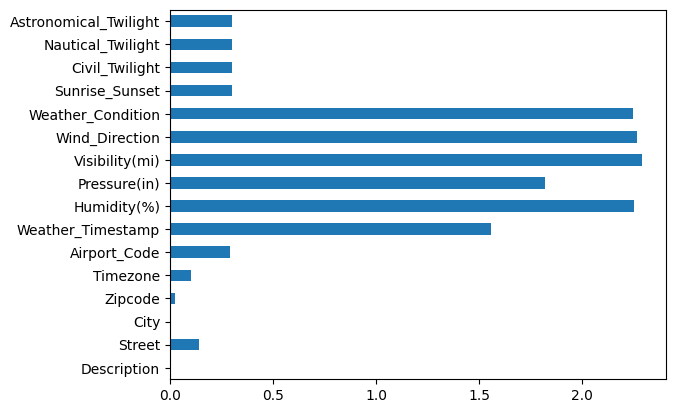

In [9]:
missing_percentage.plot(kind="barh")

## Analysing Data of cities
- How many accidents in each city
- Cities has most accidents

In [10]:
acc_city = df["City"].value_counts().sort_values(ascending=False)
acc_city

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
                  ...  
Tamms                 1
Fort Recovery         1
Odonnell              1
Immaculata            1
Rich                  1
Name: count, Length: 13678, dtype: int64

## Cities having most and least accidents 

In [11]:
city_most_accidents = acc_city[acc_city>2000]
(len(city_most_accidents)/len(df["City"]))
cities_least_accidents = acc_city[acc_city<=2000]

<Axes: xlabel='count', ylabel='Count'>

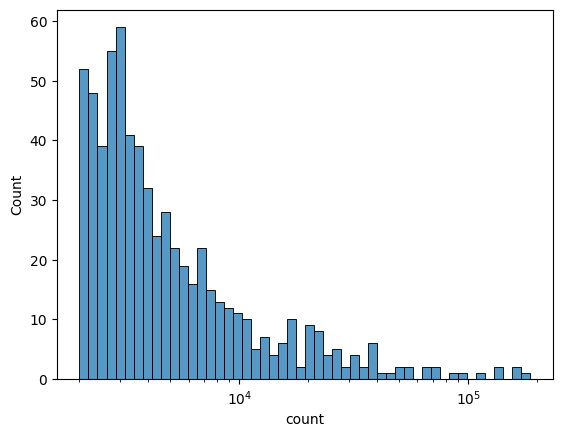

In [12]:
sns.histplot(city_most_accidents,bins=50,log_scale=True)

<Axes: xlabel='count', ylabel='Count'>

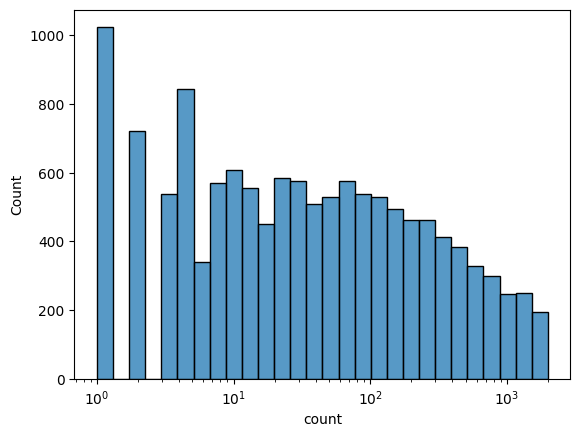

In [13]:
sns.histplot(cities_least_accidents,log_scale=True)

In [14]:
# acc_city[acc_city==1]
df["State"]

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
7728389    CA
7728390    CA
7728391    CA
7728392    CA
7728393    CA
Name: State, Length: 7728394, dtype: object

## Plotting histogram of Accidents in city
- to see how accidents are distributed over cities
- Is more cities has higher number of accidents or lower number of accidents 

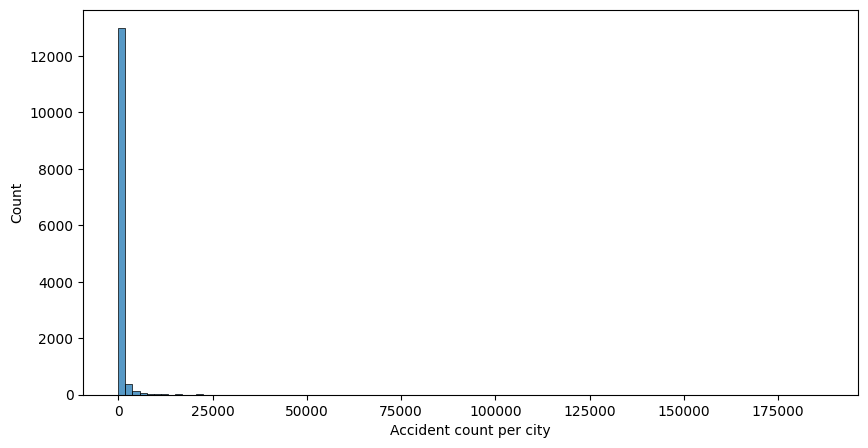

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(acc_city.values, bins=100, )
plt.xlabel("Accident count per city")
plt.show()

# Analysing  Start Time Coloumn

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_17480\1219018585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Start_Time"].dt.dayofweek,bins=7,norm_hist=True)


<Axes: xlabel='Start_Time', ylabel='Density'>

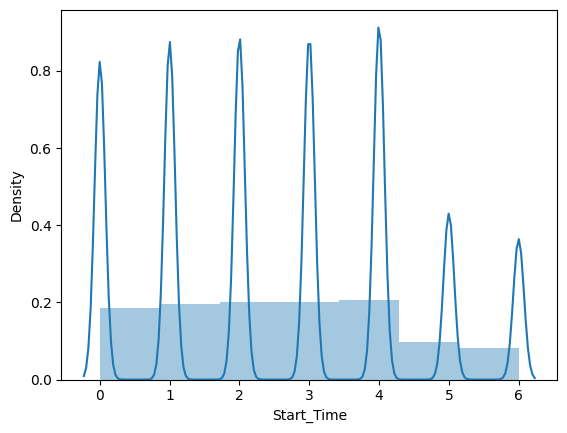

In [16]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"],errors="coerce")
sns.distplot(df["Start_Time"].dt.dayofweek,bins=7,norm_hist=True)

- distrubution by hour on weekend 

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_17480\2616226960.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(accidents_on_weekends.dt.hour)


<Axes: xlabel='Start_Time', ylabel='Density'>

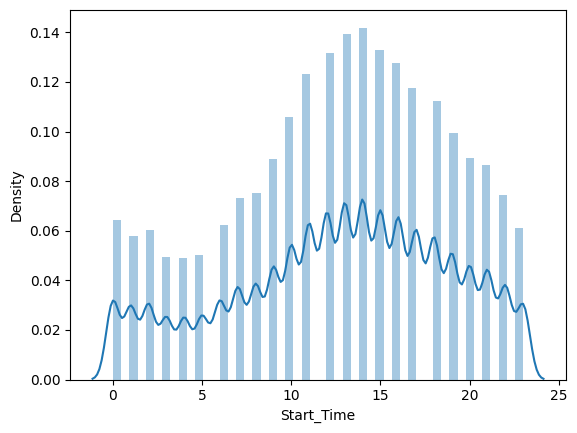

In [17]:
accidents_on_weekends = df.loc[
    df["Start_Time"].dt.dayofweek.isin([5, 6]),
    "Start_Time"
]


sns.distplot(accidents_on_weekends.dt.hour)


C:\Users\Microsoft\AppData\Local\Temp\ipykernel_17480\1882671577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(accidents_on_weekends.dt.month)


<Axes: xlabel='Start_Time', ylabel='Density'>

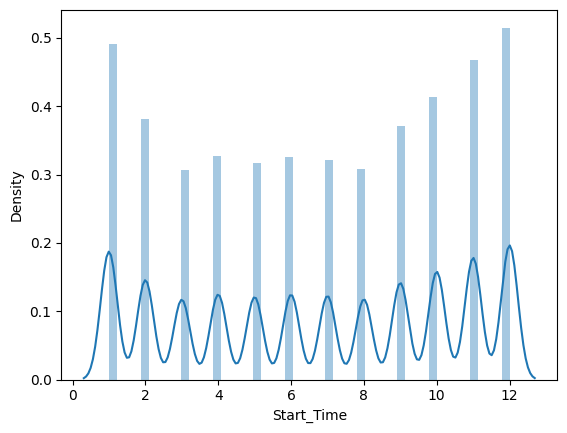

In [18]:
sns.distplot(accidents_on_weekends.dt.month)

### State Data Analysis
- Checking which state have highest number of accidents

In [21]:
df["State"].unique()


array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [25]:
highest_accident_state = df["State"].value_counts()
highest_accident_state.head(5)

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
Name: count, dtype: int64

## Analysing Weather Data

In [29]:
(df["Weather_Condition"].unique())

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

<Axes: ylabel='Weather_Condition'>

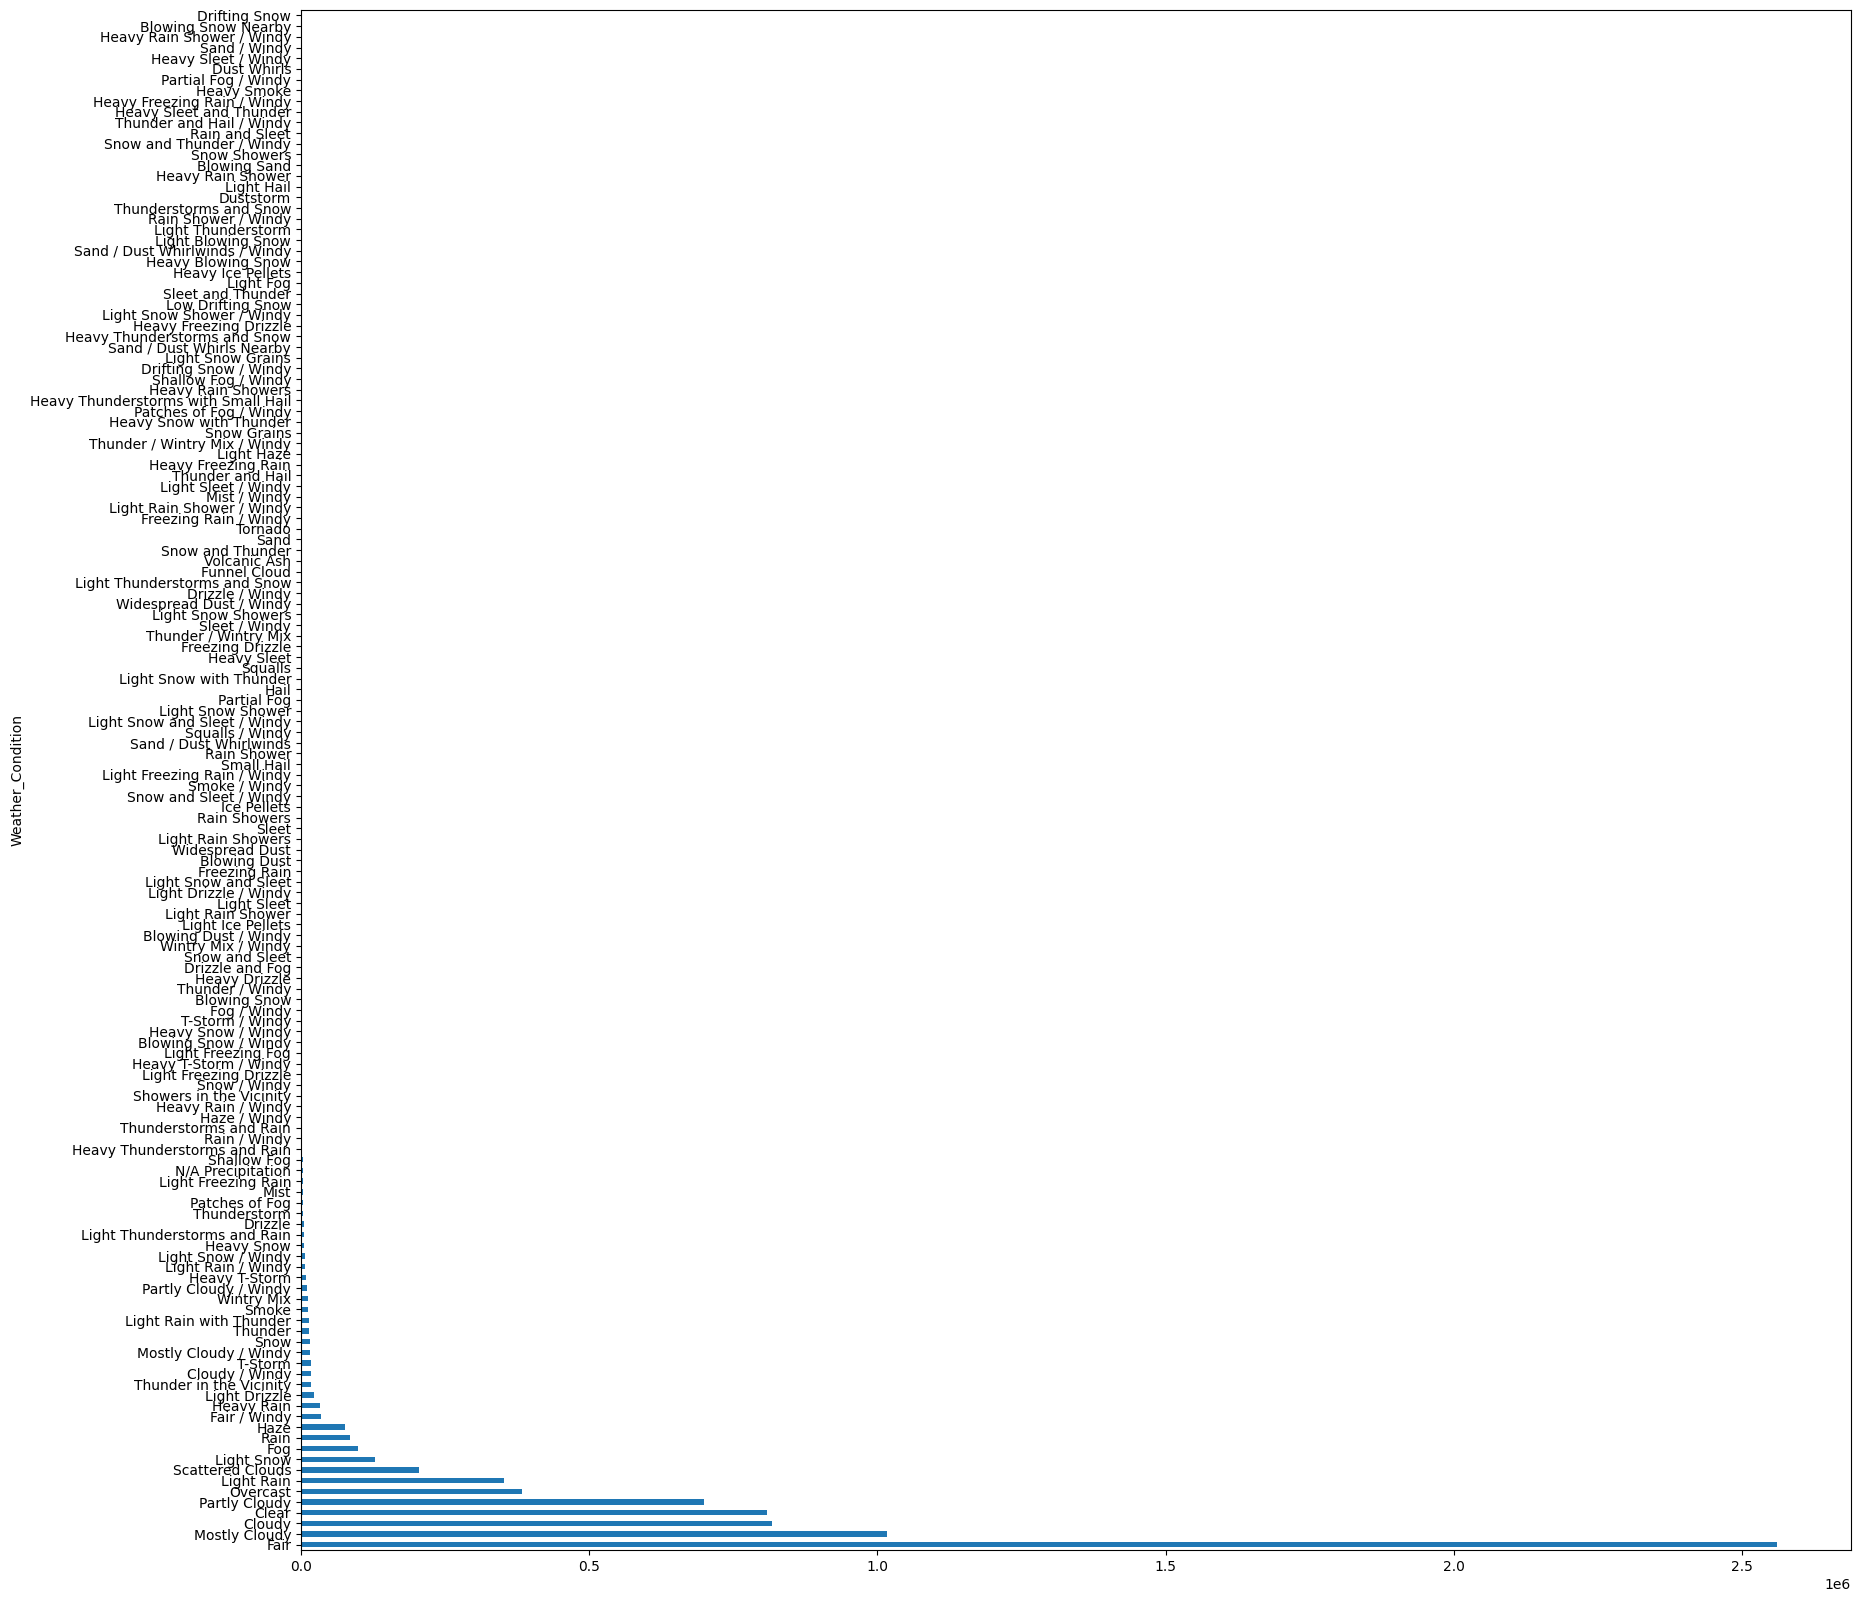

In [34]:
plt.figure(figsize=(20,20))
df["Weather_Condition"].value_counts().plot(kind="barh")

## Coloumn we'll analyse:
- Weather Condition
- State
- City
- Start Time

## Ask and Answers Questions
- Are there more accidents in warmer or cooler areas?
- Which state has highest number of accidents (per capita)  
- In which weather more accidents ocuurs?
- How many accidents occur in each city?
- Why NEw york is not present in data? And if present why it has less accidents when it is most populas city?
- In top 100 cities in number of accidents which state they most frequently belong to?
- At which time more accidents occurs?
- Which month has most acciednts
- In which weather condition most accidents occur
- What is trend of accidents year by year (increasing/decreasing)?


## Conclusions
Insights
- New York data is missing
- Less than 9% of cities have 2000 yearly accidents 
- Over 1000 reported only one accidents
- In cities number of accidents keep on decreasing exponentially
- Higher number of accidents occur in morning (6am to 9 am) and in evening (3pm to 6pm)
- On weekends more accidents are between 10am to 2pm
- Most of accidents occur in January, November and december(Due to weather condition like snow ice and consumption of alcohol in parties of christmas and thanksgiving)
- States having highest number of accidents are California, Texas, Florida, South Calorina and New York. Some have higher population but south carolina has less  population but still is in one of the most accidental state.
- Most iof accidents occur in cloudy and rainy weather. More than 80%